In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [137]:
df = pd.read_csv('Data/DATA_Customer-Churn.csv')

In [138]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [139]:
df[df.isna()].count()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [140]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

In [141]:
X.shape

(7043, 4)

### Data splitting and cleaning

In [142]:
def digitize(x):
    if x=='No':
        return 0
    if x=='Yes':
        return 1
X['TotalCharges'] = [i for i in map(lambda x: '0' if (x ==' ') else x, X['TotalCharges'])]
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'])
y =  df['Churn']
y = pd.Series([i for i in map(digitize, list(y))])   

In [143]:
X.shape

(7043, 4)

In [160]:

y.value_counts()

0    5174
1    1869
dtype: int64

In [144]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [145]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
dtype: int64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)
print('Train shape --->', X_train.shape, 'Test shape ---> ', X_test.shape)

Train shape ---> (6933, 4) Test shape --->  (3415, 4)


### Model comparison

In [129]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
nn_model = KNeighborsClassifier()
nn_model.fit(X_train, y_train)
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
pred = l_model.predict(X_test)
pd.DataFrame({'Linear regression':l_model.score(X_test, y_test),
'KNeighbour':nn_model.score(X_test, y_test),
'Decision tree':dt_model.score(X_test, y_test)}, index = ['score'])

,Linear regression,KNeighbour,Decision tree
score,0.73265,0.765739,0.752562


### Cross validating

In [169]:
#log_model
dt_scores=cross_val_score(dt_model, X_train, y_train, cv=10)
dt_scores

array([0.76224784, 0.73775216, 0.7074928 , 0.74747475, 0.77344877,
       0.73160173, 0.74170274, 0.75324675, 0.75180375, 0.75901876])

In [172]:
dt_scores.mean(), dt_scores.std()

(0.7465790053686308, 0.017460083321818632)

## Feature importance Decision Tree

<BarContainer object of 4 artists>

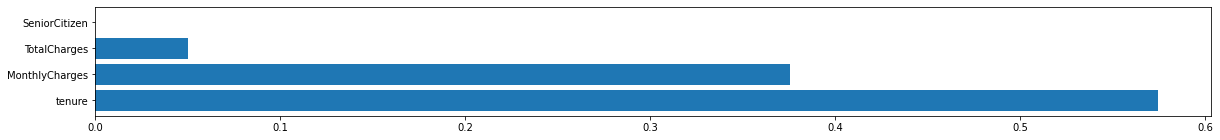

In [130]:
plt.figure(figsize=(20,2))
plt.barh(X.columns,dt_model.feature_importances_)

## Confusion matrices

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [132]:
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

Error_metric = pd.DataFrame({
    
'Error_metric': 
    [
        'Accuracy','Precision','Recall'
    ],
'Train': 
    [                               
        accuracy_score(pred_train, y_train), 
        precision_score(pred_train, y_train),
        recall_score(pred_train, y_train)
    ],
'Test':
    [
        accuracy_score(pred_test, y_test),
        precision_score(pred_test, y_test),
        recall_score(pred_test, y_test)
    ]
                            })

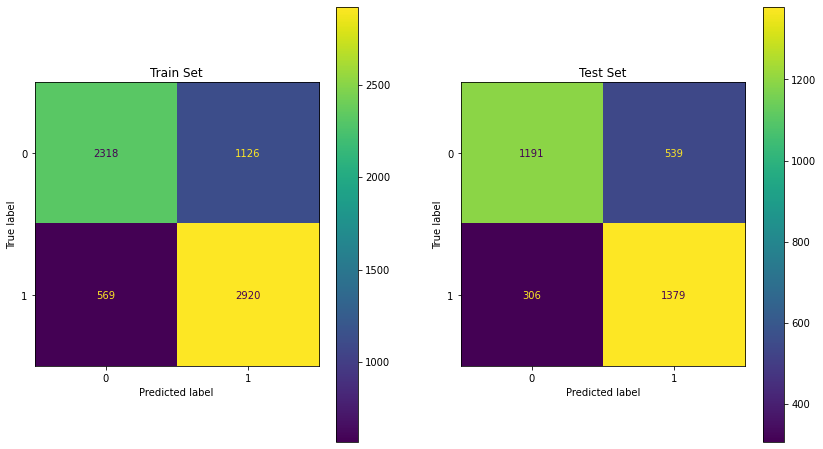

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
plot_confusion_matrix(dt_model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")
plot_confusion_matrix(dt_model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [134]:
display(Error_metric)

,Error_metric,Train,Test
0,Accuracy,0.755517,0.752562
1,Precision,0.836916,0.818398
2,Recall,0.721700,0.718978


## Use Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [242]:
rf_model = RFC(max_depth=18, random_state=0, n_estimators=100)

In [243]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, random_state=0)

### Cross-validate

In [244]:
rf_scores=cross_val_score(rf_model, X_train, y_train, cv=10)
rf_scores

array([0.78386167, 0.78962536, 0.74639769, 0.78066378, 0.77922078,
       0.76046176, 0.76623377, 0.76911977, 0.76334776, 0.79365079])

In [245]:
rf_scores.mean(), rf_scores.std()

(0.7732583138923197, 0.01391578976059422)

In [246]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

Error_metric = pd.DataFrame({
    
'Error_metric': 
    [
        'Accuracy','Precision','Recall'
    ],
'Train': 
    [                               
        accuracy_score(pred_train, y_train), 
        precision_score(pred_train, y_train),
        recall_score(pred_train, y_train)
    ],
'Test':
    [
        accuracy_score(pred_test, y_test),
        precision_score(pred_test, y_test),
        recall_score(pred_test, y_test)
    ]
                            })

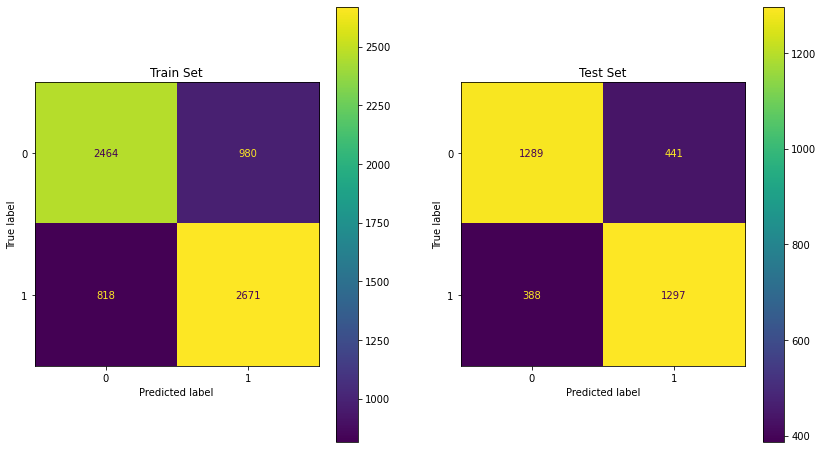

In [247]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
plot_confusion_matrix(dt_model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")
plot_confusion_matrix(dt_model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [248]:
display(Error_metric)

,Error_metric,Train,Test
0,Accuracy,0.989182,0.771303
1,Precision,0.997134,0.794065
2,Recall,0.981659,0.755079


In [190]:
P=1297/(1297+441)
P

0.7462600690448792

In [191]:
R=1297/(1297+388)
R

0.7697329376854599